# Gerardo Suarez 
## Cinvestav , Metodos Experimentales de la fisica
## Ejercicio 2

## Lo primero a Realizar es el importe de las librerias necesarias , las librerias son programas ya hechos y bien establecidos ,que realizan Tareas comunes

In [1]:
%matplotlib notebook
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# A continuacion leemos los datos que se nos fueron proporcionados via correo electronico , usando el paquete pandas (un paquete especialista en analisis de datos)

In [2]:
A=pd.read_csv('Datos.txt',sep=' ',header=None)


# Debido a que pandas es mas una libreria de Feature engineering , no nos es util para el ajuste que queremos realizar , pasamos los datos a numpy que es un paquete optimizado para operaciones matematicas

In [3]:
A=A.to_numpy()

# Usando la libreria matplotlib , una libreria para la visualizacion de datos , graficamos un histograma, y guardamos el numero de ocurrencias en la variable n y  el numero de bins en la variable bin

<IPython.core.display.Javascript object>


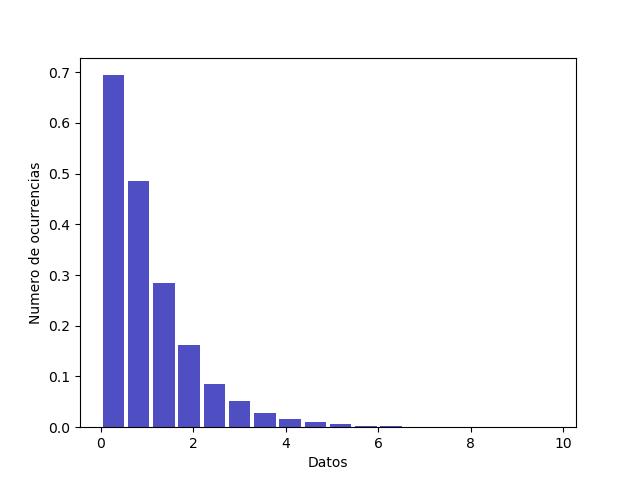

Text(0, 0.5, 'Numero de ocurrencias')

In [4]:
n, bins, patches = plt.hist(x=A, bins=18, color='#0504aa',
                            alpha=0.7, rwidth=0.85,density=True)
plt.xlabel("Datos")
plt.ylabel("Numero de ocurrencias")

## Ahora definimos el centro de cada bin y la funcion a ajustar , el centro de cada bin estara dado por $$ \frac{Coordenada bin 1 + Coordenada bin 2}{2} $$ y la funcion que adjustaremos con base a la forma del histograma es $$F(x)=\frac{e^{-p x}}{x^{a}+b}$$

In [6]:
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
def funcion2(x,b,a,p):
    return (np.exp(-b*x)*(1/((x**a)+p)))

## Ahora ajustamos la curva(a los puntos medios de los bines) y graficamos en conjunto con el histograma

<IPython.core.display.Javascript object>


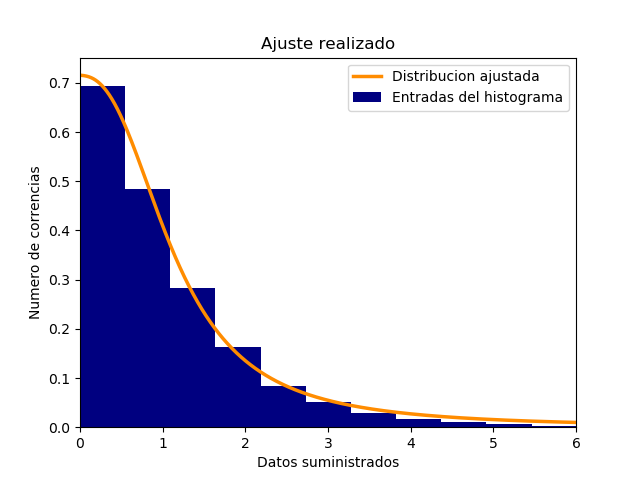

In [7]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(funcion2, xdata=binscenters, ydata=n)
xspace = np.linspace(0, 6, 100000)
plt.bar(binscenters, n, width=bins[1] - bins[0], color='navy', label=r'Entradas del histograma')
plt.plot(xspace, funcion2(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Distribucion ajustada')

plt.xlim(0,6)
plt.xlabel(r'Datos suministrados')
plt.ylabel(r'Numero de correncias')
plt.title(r'Ajuste realizado')
plt.legend(loc='best')
plt.show()

## Calculamos las Probabilidades con la distribucion , y ademas calculamos los residuos no normalizados

In [8]:
Nexp = funcion2(binscenters, *popt)
r = n - funcion2(binscenters,*popt)

# Pasamos a calcular los residuos normalizados

<IPython.core.display.Javascript object>


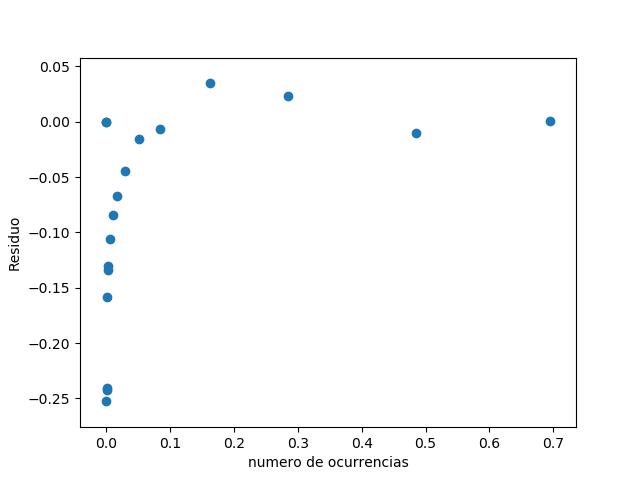

Text(0, 0.5, 'Residuo')

In [9]:
r = n - funcion2(binscenters,*popt)
f=[]
for i in range(0,len(n)):
    if n[i]>0:
        f.append(r[i]/np.sqrt(n[i]))
    else:
        f.append(0)
plt.scatter(n,f)
plt.xlabel("numero de ocurrencias")
plt.ylabel('Residuo')

# Realizamos  el calculo de $\chi^{2}$ Usando las librerias scipy(la cual no da un buen resultado)

In [10]:
from scipy import stats
B=np.array([n,Nexp])


In [11]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(B)


In [12]:
chi2_stat/dof

0.0022654346587514186

In [13]:
stats.chisquare(f_obs= n,f_exp= Nexp)  

Power_divergenceResult(statistic=0.048736311776057514, pvalue=1.0)

# Vista la falla de las librerias concluimos a que esta se debe a que la libreria calcula $\chi^{2}$ con la siguiente ecuacion $$\chi^{2}=\sum{\frac{y_{i}-y(x_{i})}{y(x_{i})}}$$  sin embargo en este caso y despues de aclarar dudas la forma correcta es $$\chi^{2}=\sum{\frac{y_{i}-y(x_{i})}{\alpha_{i}}}$$
# Y en este caso $\alpha_{i}=\sqrt{N_{i}}$ , asi que pasamos a calcular $\chi^{2}$

In [14]:
N= funcion2(binscenters,*popt)
r = n-N


# Ya que con el objetivo de ajustar mejor la distibucion , escogimos un numero de bines tal que en algunos bines no hay ocurrencias , debemos tener cuidado al calcular $\chi^{2}$ , para ello eliminamos los i con n[i]=0 ya que estos no contribuyen al $\chi^{2}$

In [15]:
clack=[]
for i in range(0,len(n)):
    if n[i]>0:
        clack.append((r**2)/(n[i]))


# Dividimos entre el numero de grados de libertad

In [16]:
np.sum(clack)/15

1.012791694249898

In [17]:
popt

array([0.01834397, 2.51854781, 1.39729961])

<IPython.core.display.Javascript object>


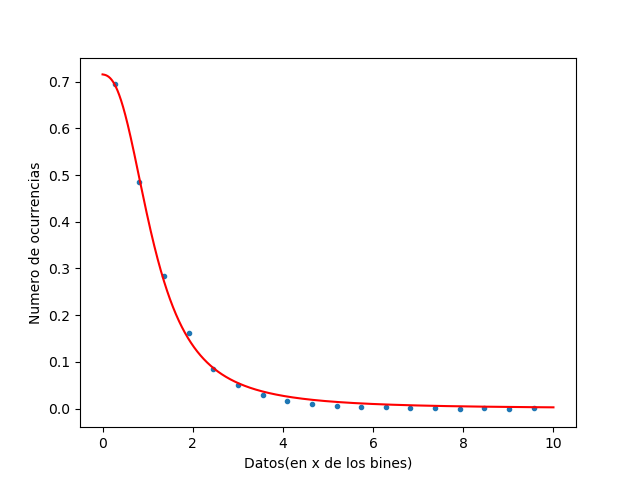

Text(0, 0.5, 'Numero de ocurrencias')

In [18]:
plt.scatter(binscenters,n,s=9)
x=np.linspace(0,10,10000)
plt.plot(x,funcion2(x,*popt),color='red')
plt.xlabel("Datos(en x de los bines)")
plt.ylabel('Numero de ocurrencias')

# Pasamos a calcular D

In [19]:
D=[]
for i in range(1,len(f)):
    if f[i]>0:
        D.append(((f[i]-f[i-1])**2))

In [20]:
s=np.sum(D)
k=np.sum(r**2)

In [21]:
s/k

1.3568434147969701

## Como podemos ver el valor de D esta algo alejado de dos , y por lo tanto podemos ver que hay cierta correlacion en los datos , ademas de eso podemos ver un pico desplazado en la distribucion que no deberia estar alli , sin embargo esta fue la funcion ajustada que me proporciono un mejor equilibrio entre un buen $\chi^{2}$ y una buena constante D

# Algunos de las otras funciones intentadas fueron $$e^{ax^{2}+bx+c}$$$$be^{ax^{c}}$$$$x^{a-1}e^{bx}$$$$\frac{ e^{-x} Funciongamma(a/2)}{1+x^{d}}$$ , entre muchas otras incluidas la mayoria  de las distribuciones continuas en https://docs.scipy.org/doc/scipy/reference/stats.html

 ## La grafica de los residuos que se incluye aqui no es del todo similar a las que aparecen en las diapositivas(especificamente en la seccion de D) , por que no se esta seguro de la implementacion , se parecen a las presentadas anteriormente en conjunto con los ajustes , la version "mal implementada se encuentra abajo"

<IPython.core.display.Javascript object>


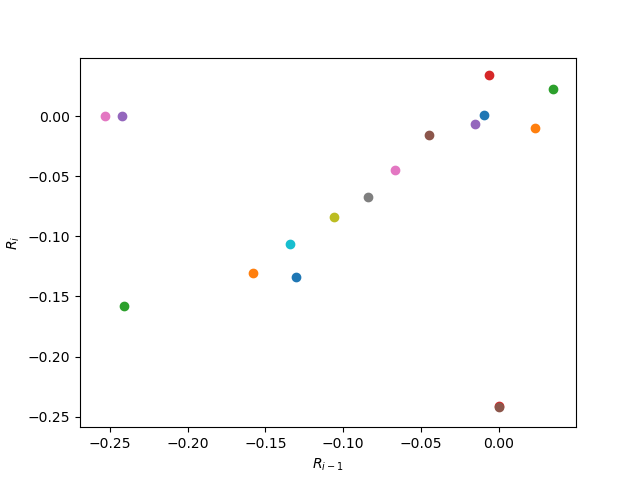

In [22]:
r = n - funcion2(binscenters,*popt)
f=[]
for i in range(0,len(n)):
    if n[i]>0:
        f.append(r[i]/np.sqrt(n[i]))
    else:
        f.append(0)
for i in range(1,len(f)):
    plt.scatter(f[i],f[i-1])
plt.xlabel('$R_{i-1}$')
plt.ylabel('$R_{i}$')
plt.show()

# Aunque se que no es el mejor ajuste , lamentablemente perdi mucho tiempo en calcular correctamente $\chi^{2}$ y debido a la hora de entrega  y el asistir a la catedra GAE a las 4,me vi forzado a entregar el ajuste que mejor estimacion arrojo apesar de no estar conforme con el  , a pesar de que no es excusa , quise expresar el hecho de que no es el mejor ajuste que se pudo haber logrado 

# El ajuste computaba la matriz de covarianza que esta dada por 

In [23]:
pcov

array([[ 0.00047487, -0.00157046, -0.00042489],
       [-0.00157046,  0.00783053,  0.00151373],
       [-0.00042489,  0.00151373,  0.00058266]])

In [24]:
np.diag(pcov)

array([0.00047487, 0.00783053, 0.00058266])